First reading the dataset 

In [32]:
# import numpy package for arrays and stuff
import numpy as np 
  
# import matplotlib.pyplot for plotting our result
import matplotlib.pyplot as plt
  
# import pandas for importing csv files 
import pandas as pd 

import matplotlib as plt
import math
import tensorflow as tf
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler


data = pd.read_csv("C://Users//sarvinoz.toshpulotov//Desktop//FYP_Final//codes//Daily//Dataset2.csv")
df = pd.read_csv("C://Users//sarvinoz.toshpulotov//Desktop//FYP_Final//codes//Daily//Dataset2.csv")
data


,day_of_week,notes,hour,minute,day,month,quarter,year,Temp_max,Temp_avg,...,Hum_avg,Hum_min,Wind_max,Wind_avg,Wind_min,Press_max,Press_avg,Press_min,Precipit,Power Consumption
0,5,3,0,0,6,2,1,2016,76,71.2,...,96.8,89,18,7.8,0,29.8,29.8,29.7,4.33,216.552449
1,5,3,1,0,6,2,1,2016,76,71.2,...,96.8,89,18,7.8,0,29.8,29.8,29.7,4.33,240.723249
2,5,3,2,0,6,2,1,2016,76,71.2,...,96.8,89,18,7.8,0,29.8,29.8,29.7,4.33,246.969242
3,5,3,3,0,6,2,1,2016,76,71.2,...,96.8,89,18,7.8,0,29.8,29.8,29.7,4.33,235.750502
4,5,3,4,0,6,2,1,2016,76,71.2,...,96.8,89,18,7.8,0,29.8,29.8,29.7,4.33,149.885942
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10963,4,0,19,0,26,6,2,2020,86,81.0,...,82.5,72,15,6.2,0,30.0,29.9,29.9,0.39,255.009000
10964,4,0,20,0,26,6,2,2020,86,81.0,...,82.5,72,15,6.2,0,30.0,29.9,29.9,0.39,243.913000
10965,4,0,21,0,26,6,2,2020,86,81.0,...,82.5,72,15,6.2,0,30.0,29.9,29.9,0.39,121.944000
10966,4,0,22,0,26,6,2,2020,86,81.0,...,82.5,72,15,6.2,0,30.0,29.9,29.9,0.39,118.944000


In [33]:
CorData = data.corr(method='kendall')
with pd.option_context('display.max_rows', None, 'display.max_columns', CorData.shape[1]):
    print(CorData)

                   day_of_week     notes      hour  minute       day  \
day_of_week           1.000000  0.507569  0.000000     NaN  0.012576   
notes                 0.507569  1.000000  0.000716     NaN -0.078758   
hour                  0.000000  0.000716  1.000000     NaN  0.000000   
minute                     NaN       NaN       NaN     1.0       NaN   
day                   0.012576 -0.078758  0.000000     NaN  1.000000   
month                -0.023200  0.022581  0.000000     NaN  0.012913   
quarter              -0.022122  0.037556  0.000000     NaN -0.002614   
year                  0.001768 -0.207183  0.000000     NaN -0.025477   
Temp_max             -0.012925 -0.028281  0.000000     NaN  0.082076   
Temp_avg             -0.012060 -0.011308  0.000000     NaN  0.069780   
Temp_min              0.002043  0.019979  0.000000     NaN  0.077622   
Dew_max               0.009860  0.025314  0.000000     NaN  0.073914   
Dew_avg               0.009830  0.039599  0.000000     NaN  0.05

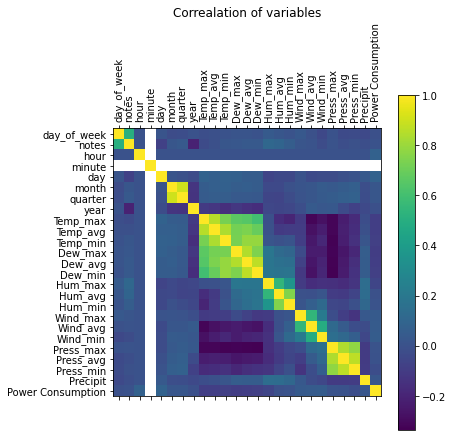

In [34]:
import matplotlib.pyplot as plt
plt.matshow(CorData)
plt.xticks(range(len(CorData.columns)), CorData.columns, rotation = 90)
plt.yticks(range(len(CorData.columns)), CorData.columns)
plt.title("Correalation of variables")
plt.colorbar()
plt.rcParams["figure.figsize"] = (15,7)
plt.show()

The correlation of features demontrated above. The color range shows the dependance of the feature from other features. The yellow collor shows it's dependent, and the dark blue shows it's not related to each other.

Next, after finding the correlation, some features can be removed.

In [35]:
# removing unnecessary features
# df = data.drop(columns = ["minute","Temp_max", "Temp_avg", "Temp_min", "Dew_min", "Dew_avg", "Dew_max", "Press_min", "Hum_max", "day_of_week", "Wind_min"])
df.columns
df.isnull().sum()

day_of_week          0
notes                0
hour                 0
minute               0
day                  0
month                0
quarter              0
year                 0
Temp_max             0
Temp_avg             0
Temp_min             0
Dew_max              0
Dew_avg              0
Dew_min              0
Hum_max              0
Hum_avg              0
Hum_min              0
Wind_max             0
Wind_avg             0
Wind_min             0
Press_max            0
Press_avg            0
Press_min            0
Precipit             0
Power Consumption    0
dtype: int64

After removing unnecessary features, we will check for null variables and replace the by the mean values.

In [36]:

df.isnull().sum()



day_of_week          0
notes                0
hour                 0
minute               0
day                  0
month                0
quarter              0
year                 0
Temp_max             0
Temp_avg             0
Temp_min             0
Dew_max              0
Dew_avg              0
Dew_min              0
Hum_max              0
Hum_avg              0
Hum_min              0
Wind_max             0
Wind_avg             0
Wind_min             0
Press_max            0
Press_avg            0
Press_min            0
Precipit             0
Power Consumption    0
dtype: int64

In [37]:
df.describe

<bound method NDFrame.describe of        day_of_week  notes  hour  minute  day  month  quarter  year  Temp_max  \
0                5      3     0       0    6      2        1  2016        76   
1                5      3     1       0    6      2        1  2016        76   
2                5      3     2       0    6      2        1  2016        76   
3                5      3     3       0    6      2        1  2016        76   
4                5      3     4       0    6      2        1  2016        76   
...            ...    ...   ...     ...  ...    ...      ...   ...       ...   
10963            4      0    19       0   26      6        2  2020        86   
10964            4      0    20       0   26      6        2  2020        86   
10965            4      0    21       0   26      6        2  2020        86   
10966            4      0    22       0   26      6        2  2020        86   
10967            4      0    23       0   26      6        2  2020        86   

     

Next is dividing the dataset into X and Y

In [38]:
# dividing the dataset into X and Y
X = df.iloc[:, 0:-1].values
y = df.iloc[:, -1].values

After splitting the dataset into X and Y, we will normalize the dataset

In [39]:
# Preprocessing the data using MinMax Scaler, which is used for normalization
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0,1))
x_scaled = sc.fit_transform(X)
y_scaled = sc.fit_transform(y.reshape(-1,1))

Then, we divide the data into training and testing set. As it is daily prediction, so the testing size will be 24 hours, and the rest will be training data.

In [40]:
X_train =  x_scaled[:10944, 0:-1]
y_train =  y_scaled[:10944, -1]
X_test  = x_scaled[10944:, 0:-1]
y_test =  y_scaled[10944:, -1]


Next the first algorithm that we will apply is KNN. First we save the regressor in neigh variable, then we train the model by fitting into it X_train and y_train, then we make predictions based on X_test. Also, we did prediction for training data as well, to check whether te model is overfitted or not.

In [41]:
# import the regressor and apply the algorithm
from sklearn.neighbors import KNeighborsRegressor
neigh = KNeighborsRegressor(n_neighbors=15)    

neigh.fit(X_train, y_train)

knn_y_pred=neigh.predict(X_test)
knn_y_pred_train = neigh.predict(X_train)

After making predictions, we denormalize the data.

In [42]:
# reversing the normalized dataset
knn_y_test = sc.inverse_transform(y_test.reshape(-1,1))
knn_y_pred = sc.inverse_transform(knn_y_pred.reshape(-1,1))

knn_y_train = sc.inverse_transform(y_train.reshape(-1,1))
knn_y_pred_train = sc.inverse_transform(knn_y_pred_train.reshape(-1,1))


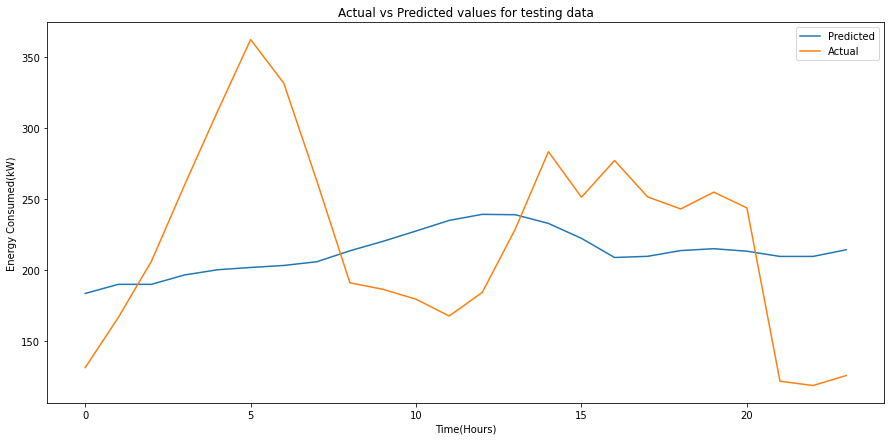

In [43]:
import matplotlib.pyplot as plt
plt.title("Actual vs Predicted values for testing data")
plt.plot(knn_y_pred, label = "Predicted")
plt.plot(knn_y_test, label = "Actual")
legend = plt.legend()
plt.xlabel("Time(Hours)")
plt.ylabel("Energy Consumed(kW)")
plt.rcParams["figure.figsize"] = (8,6)
plt.show()


Perfomance evaluation metrics are calculated below.

In [44]:
#performance evaluation mmetrics to check the accuraty of the model
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error,r2_score
mae= mean_absolute_error(knn_y_test, knn_y_pred)
mse = mean_squared_error(knn_y_test, knn_y_pred)
rmse = np.sqrt(mse)
mape = mean_absolute_percentage_error(knn_y_test, knn_y_pred)
r2 = r2_score(knn_y_test, knn_y_pred)
print("Performance evaluation for testing data")
print(round(r2,2))
print(round(mae,2))
print(round(mape,2))
print(round(mse,2))
print(round(rmse,2))

print("Performance evaluation for training data")

mae1= mean_absolute_error(knn_y_train, knn_y_pred_train)
mse1 = mean_squared_error(knn_y_train, knn_y_pred_train)
rmse1 = np.sqrt(mse1)
print(round(mae1,2))
print(round(mse1,2))
print(round(rmse1,2))

Performance evaluation for testing data
-0.1
58.53
0.29
4747.42
68.9
Performance evaluation for training data
54.22
5320.12
72.94


Next algorithm that is going to be applied is XGBoost. It is also tree based algorithm. Its advantage is the speed and accuracy score.

In [45]:
# import the regressor
import xgboost as xg
  
  # create regressor object
xgb_r =xg.XGBRegressor(objective="reg:squarederror", n_estimators = 25, seed = 15)
xgb_r.fit(X_train, y_train)


xgb_y_pred = xgb_r.predict(X_test)

xgb_y_pred_train = xgb_r.predict(X_train)

# reversing the normalized dataset
xgb_y_test = sc.inverse_transform(y_test.reshape(-1,1))
xgb_y_pred = sc.inverse_transform(xgb_y_pred.reshape(-1,1))

xgb_y_train = sc.inverse_transform(y_train.reshape(-1,1))
xgb_y_pred_train = sc.inverse_transform(xgb_y_pred_train.reshape(-1,1))

The graph of predicted and actual is shown below.

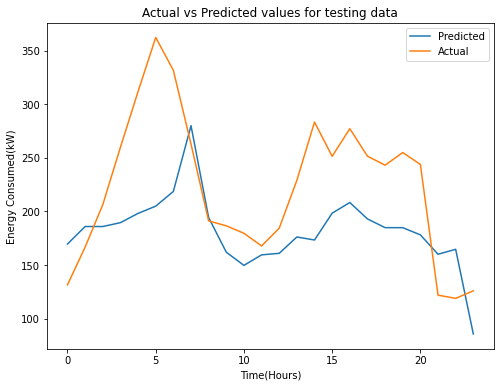

In [46]:
import matplotlib.pyplot as plt
plt.title("Actual vs Predicted values for testing data")
plt.plot(xgb_y_pred, label = "Predicted")
plt.plot(xgb_y_test, label = "Actual")
legend = plt.legend()
plt.xlabel("Time(Hours)")
plt.ylabel("Energy Consumed(kW)")
plt.show()


In [47]:
#performance evaluation mmetrics to check the accuraty of the model
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error
mae= mean_absolute_error(xgb_y_test, xgb_y_pred)
mse = mean_squared_error(xgb_y_test, xgb_y_pred)
rmse = np.sqrt(mse)
mape = mean_absolute_percentage_error(xgb_y_test, xgb_y_pred)
print("Performance evaluation for testing data")
print(round(mae,2))
print(round(mape,2))
print(round(mse,2))
print(round(rmse,2))

r2 = r2_score(xgb_y_test, xgb_y_pred)
print("Performance evaluation for testing data")
print(round(r2,2))

mae1= mean_absolute_error(xgb_y_train, xgb_y_pred_train)
mse1 = mean_squared_error(xgb_y_train, xgb_y_pred_train)
rmse1 = np.sqrt(mse1)
mape1 = mean_absolute_percentage_error(xgb_y_train, xgb_y_pred_train)
print(round(mae1,2))
print(round(mape1,2))
print(round(mse1,2))
print(round(rmse1,2))


Performance evaluation for testing data
54.18
0.23
4324.46
65.76
Performance evaluation for testing data
-0.01
33.29
0.17
2839.93
53.29


Next algorithm that we are going to apply is classification and decision tree algorithm.

In [48]:
# import the regressor
from sklearn.tree import DecisionTreeRegressor 
  
# create a regressor object
regressor = DecisionTreeRegressor(random_state = 10, max_depth = 35, min_samples_leaf= 30) 
  
# fit the regressor with x and y data
regressor.fit(X_train, y_train) 
dt_y_pred = regressor.predict(X_test)
dt_y_pred_train = regressor.predict(X_train)
dt_y_test = sc.inverse_transform(y_test.reshape(-1,1))
dt_y_pred = sc.inverse_transform(dt_y_pred.reshape(-1,1))

dt_y_train = sc.inverse_transform(y_train.reshape(-1,1))
dt_y_pred_train = sc.inverse_transform(dt_y_pred_train.reshape(-1,1))

The graph of actual and predicted is shown below.

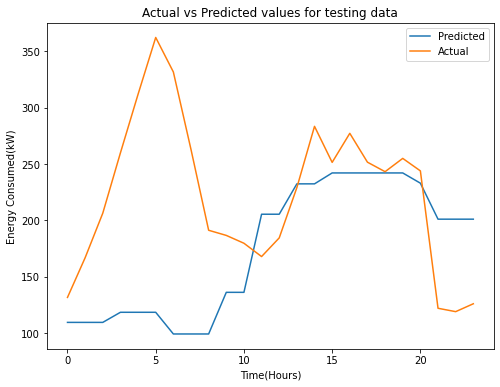

In [49]:
import matplotlib.pyplot as plt
plt.title("Actual vs Predicted values for testing data")
plt.plot(dt_y_pred, label = "Predicted")
plt.plot(dt_y_test, label = "Actual")
legend = plt.legend()
plt.xlabel("Time(Hours)")
plt.ylabel("Energy Consumed(kW)")
plt.show()


In [50]:
#performance evaluation mmetrics to check the accuraty of the model
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error
mae= mean_absolute_error(dt_y_test, dt_y_pred)
mse = mean_squared_error(dt_y_test, dt_y_pred)
rmse = np.sqrt(mse)
mape = mean_absolute_percentage_error(dt_y_test, dt_y_pred)
r2 = r2_score(dt_y_test, dt_y_pred)
print("Performance evaluation for testing data")
print(round(r2,2))
print(round(mae,2))
print(round(mape,2))
print(round(mse,2))
print(round(rmse,2))

print("Performance evaluation for training data")

mae1= mean_absolute_error(dt_y_train, dt_y_pred_train)
mse1 = mean_squared_error(dt_y_train, dt_y_pred_train)
rmse1 = np.sqrt(mse1)
mape1 = mean_absolute_percentage_error(dt_y_train, dt_y_pred_train)
print(round(mae1,2))
print(round(mape1,2))
print(round(mse1,2))
print(round(rmse1,2))

Performance evaluation for testing data
-1.41
73.61
0.33
10370.76
101.84
Performance evaluation for training data
38.41
0.19
3940.91
62.78


In [51]:
# import the regressor
from sklearn.ensemble import RandomForestRegressor
  
  # create regressor object
rf = RandomForestRegressor(n_estimators = 100, random_state = 15) 

rf.fit(X_train, y_train)

rf_y_pred=rf.predict(X_test)
rf_y_pred_train = rf.predict(X_train)

# reversing the normalized dataset
rf_y_test = sc.inverse_transform(y_test.reshape(-1,1))
rf_y_pred = sc.inverse_transform(rf_y_pred.reshape(-1,1))

rf_y_train = sc.inverse_transform(y_train.reshape(-1,1))
rf_y_pred_train = sc.inverse_transform(rf_y_pred_train.reshape(-1,1))

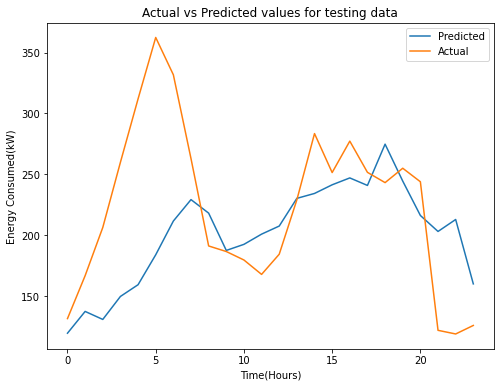

In [52]:
import matplotlib.pyplot as plt
plt.title("Actual vs Predicted values for testing data")
plt.plot(rf_y_pred, label = "Predicted")
plt.plot(rf_y_test, label = "Actual")
legend = plt.legend()
plt.xlabel("Time(Hours)")
plt.ylabel("Energy Consumed(kW)")
plt.show()

In [53]:
#performance evaluation mmetrics to check the accuraty of the model
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error
mae= mean_absolute_error(rf_y_test, rf_y_pred)
mse = mean_squared_error(rf_y_test, rf_y_pred)
rmse = np.sqrt(mse)
mape = mean_absolute_percentage_error(rf_y_test, rf_y_pred)
r2 = r2_score(rf_y_test, rf_y_pred)
print("Performance evaluation for testing data")
print(round(r2,2))
print(round(mae,2))
print(round(mape,2))
print(round(mse,2))
print(round(rmse,2))

print("Performance evaluation for training data")

mae1= mean_absolute_error(rf_y_train, rf_y_pred_train)
mse1 = mean_squared_error(rf_y_train, rf_y_pred_train)
rmse1 = np.sqrt(mse1)
mape1 = mean_absolute_percentage_error(rf_y_train, rf_y_pred_train)
print(round(mae1,2))
print(round(mape1,2))
print(round(mse1,2))
print(round(rmse1,2))


Performance evaluation for testing data
-0.1
49.54
0.23
4751.17
68.93
Performance evaluation for training data
9.75
0.05
407.52
20.19


Next step, we will create a dataframe where we will join the predicted values of knn, xgboost and random forest

In [54]:
df_new = pd.DataFrame()
df_new["knn"] = pd.DataFrame(knn_y_pred)
df_new["xgb"] = pd.DataFrame(xgb_y_pred)
df_new["rf"] = pd.DataFrame(rf_y_pred)

df_new["min"]= df_new.min(axis=1)
df_new["max"]= df_new.max(axis=1)
df_new["avg"]= df_new.mean(axis=1)
df_new["actual"] = pd.DataFrame(rf_y_test)
df_new



,knn,xgb,rf,min,max,avg,actual
0,183.725956,169.655060,119.582052,119.582052,183.725956,155.254215,131.578
1,190.137149,185.980331,137.458155,137.458155,190.137149,168.234188,166.818
2,190.137149,185.980331,130.877650,130.877650,190.137149,165.601986,206.368
3,196.730679,189.580994,149.753671,149.753671,196.730679,176.509939,259.905
4,200.389560,198.232925,159.382765,159.382765,200.389560,183.555515,311.958
5,202.006767,204.968353,183.953356,183.953356,204.968353,195.970037,362.370
6,203.422864,218.714722,211.651898,203.422864,218.714722,211.185414,331.732
7,206.028719,280.056427,229.247358,206.028719,280.056427,240.283530,262.909
8,213.737150,194.329453,218.157185,194.329453,218.157185,207.742085,191.199
9,220.386826,162.021393,187.532239,162.021393,220.386826,190.469735,186.631


After having the dataframe ready, next we will aplly performance evaluation metrics 

In [55]:
#performance evaluation mmetrics to check the accuraty of the model
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, r2_score
mae_min= mean_absolute_error(df_new["actual"], df_new["min"])
mse_min = mean_squared_error(df_new["actual"], df_new["min"])
rmse_min = np.sqrt(mse_min)
mape_min = mean_absolute_percentage_error(df_new["actual"], df_new["min"])
r2 = r2_score(df_new["actual"], df_new["min"])
print(round(mae_min,2))
print(round(mape_min,2))
print(round(mse_min,2))
print(round(rmse_min,2))
print(round(r2,2))

62.27
0.26
5811.74
76.23
-0.35


In [56]:
mae_avg= mean_absolute_error(df_new["actual"], df_new["avg"])
mse_avg = mean_squared_error(df_new["actual"], df_new["avg"])
rmse_avg = np.sqrt(mse_avg)
mape_avg = mean_absolute_percentage_error(df_new["actual"], df_new["avg"])
r2 = r2_score(df_new["actual"], df_new["avg"])
print(round(mae_avg,2))
print(round(mape_avg,2))
print(round(mse_avg,2))
print(round(rmse_avg,2))
print(round(r2,2))

47.62
0.21
3967.22
62.99
0.08


In [58]:
mae_max= mean_absolute_error(df_new["actual"], df_new["max"])
mse_max = mean_squared_error(df_new["actual"], df_new["max"])
rmse_max = np.sqrt(mse_max)
mape_max = mean_absolute_percentage_error(df_new["actual"], df_new["max"])
r2 = r2_score(df_new["actual"], df_new["max"])
print(round(r2,2))
print(round(mae_max,2))
print(round(mape_max,2))
print(round(mse_max,2))
print(round(rmse_max,2))


0.04
51.47
0.26
4142.75
64.36
